In [9]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np
import argparse

#Averageing Filter

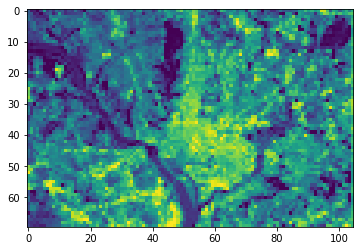

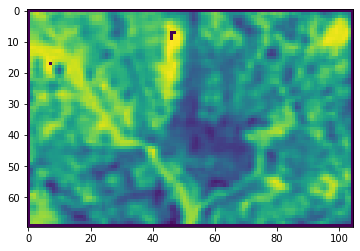

In [2]:
img = cv2.imread('test7.png', 0)  
m, n = img.shape 
mask = np.ones([3, 3], dtype = int) 
mask = mask / -9 
img_new = np.zeros([m, n]) 

for i in range(1, m-1): 
	for j in range(1, n-1): 
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
		
		img_new[i, j]= temp 
		
img_new = img_new.astype(np.uint8) 


# Display the images
plt.imshow(img) 
plt.show()

# Display the images
plt.imshow(img_new) 
plt.show()

#Median Filter

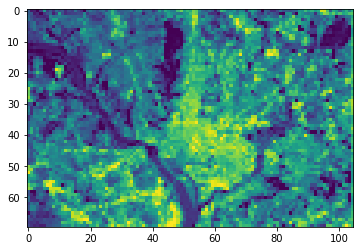

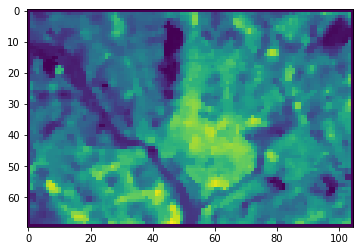

In [3]:
img = cv2.imread('test7.png', 0)  
m, n = img.shape 
img_new1 = np.zeros([m, n]) 

for i in range(1, m-1): 
	for j in range(1, n-1): 
		temp = [img[i-1, j-1], 
			img[i-1, j], 
			img[i-1, j + 1], 
			img[i, j-1], 
			img[i, j], 
			img[i, j + 1], 
			img[i + 1, j-1], 
			img[i + 1, j], 
			img[i + 1, j + 1]] 
		
		temp = sorted(temp) 
		img_new1[i, j]= temp[4] 

img_new1 = img_new1.astype(np.uint8) 



# Display the images
plt.imshow(img) 
plt.show()

# Display the images
plt.imshow(img_new1) 
plt.show()

#Max Filter


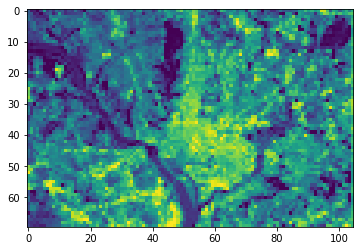

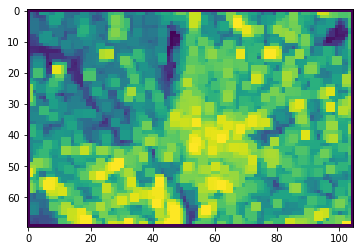

In [7]:
img = cv2.imread('test7.png', 0)
m, n = img.shape
  
# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9
  
# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):

      arr = [img[i-1, j-1],img[i-1, j],img[i-1, j + 1],img[i, j-1], img[i, j],img[i, j + 1],img[i + 1, j-1],img[i + 1, j],img[i + 1, j + 1]]
      #print(arr)
      value = max(arr)
      img_new[i, j]= float(value)
         
img_new = img_new.astype(np.uint8)
# Display the images
plt.imshow(img) 
plt.show()

plt.imshow(img_new)
plt.show()

#Gaussian Blur

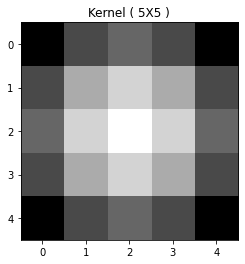

Found 3 Channels : (70, 105, 3)
Converted to Gray Channel. Size : (70, 105)
Kernel Shape : (5, 5)


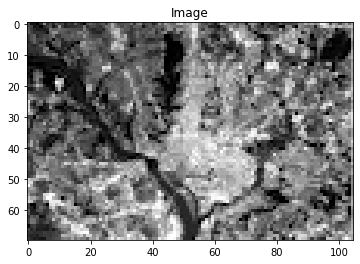

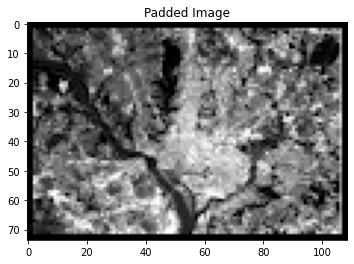

Output Image size : (70, 105)


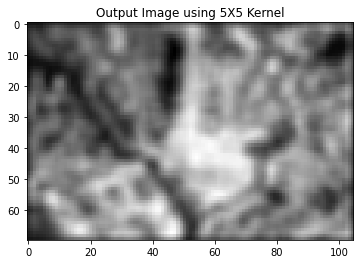

In [15]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return output 
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 
 
def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
 
    return kernel_2D
 
 
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)
 
 
if __name__ == '__main__':

    image = cv2.imread("test7.png")
    gaussian_blur(image, 5, verbose=True)
